In [3]:
import pandas as pd

df = pd.read_csv("utkface_file_names.csv")

In [4]:
df

,10_0_4_20170103212521420.jpg.chip.jpg
0,10_1_0_20170109204844109.jpg.chip.jpg
1,10_0_0_20170110224500062.jpg.chip.jpg
2,10_1_0_20170109202251032.jpg.chip.jpg
3,10_0_0_20170110225246490.jpg.chip.jpg
4,10_1_0_20170109203427416.jpg.chip.jpg
...,...
144,10_1_0_20170109204859493.jpg.chip.jpg
145,10_1_1_20170109202938302.jpg.chip.jpg
146,10_0_4_20170103201924664.jpg.chip.jpg
147,10_0_3_20170105175322885.jpg.chip.jpg


In [5]:
df.shape[0]

149

In [6]:
df["10_0_4_20170103212521420.jpg.chip.jpg"][0][:10]

'10_1_0_201'

In [7]:
l = list(map(int,df["10_0_4_20170103212521420.jpg.chip.jpg"][0][:10].split('_')))

In [8]:
l

[10, 1, 0, 201]

In [9]:
age_t = []
sex_t = []
race_t = []

In [10]:
for i in range(0,df.shape[0]):
    l = list(map(int,df["10_0_4_20170103212521420.jpg.chip.jpg"][i][:10].split('_')))
    age_t.append(l[0])
    sex_t.append(l[1])
    race_t.append(l[2])

In [11]:
len(age_t)

149

In [12]:
df["Age"] = age_t
df["Gender"] = sex_t
df["Race"] = race_t

In [13]:
df

,10_0_4_20170103212521420.jpg.chip.jpg,Age,Gender,Race
0,10_1_0_20170109204844109.jpg.chip.jpg,10,1,0
1,10_0_0_20170110224500062.jpg.chip.jpg,10,0,0
2,10_1_0_20170109202251032.jpg.chip.jpg,10,1,0
3,10_0_0_20170110225246490.jpg.chip.jpg,10,0,0
4,10_1_0_20170109203427416.jpg.chip.jpg,10,1,0
...,...,...,...,...
144,10_1_0_20170109204859493.jpg.chip.jpg,10,1,0
145,10_1_1_20170109202938302.jpg.chip.jpg,10,1,1
146,10_0_4_20170103201924664.jpg.chip.jpg,10,0,4
147,10_0_3_20170105175322885.jpg.chip.jpg,10,0,3


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

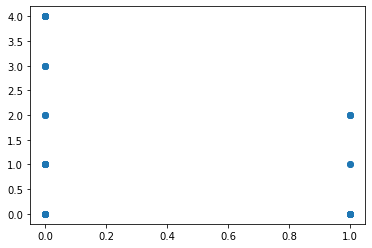

In [15]:
#df.scatter(x='Gender', y='Race')
plt.scatter(df["Gender"], df["Race"])

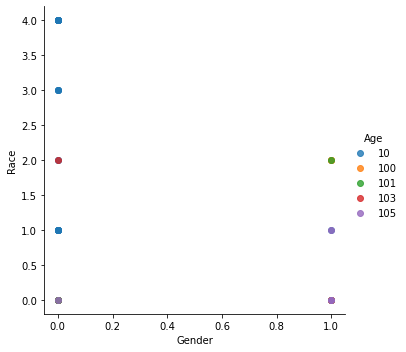

In [16]:
sns.lmplot( x="Gender", y="Race", data=df, fit_reg=False, hue='Age', legend=True)
 
# Move the legend to an empty part of the plot
#plt.legend(loc='lower right')

plt.show()

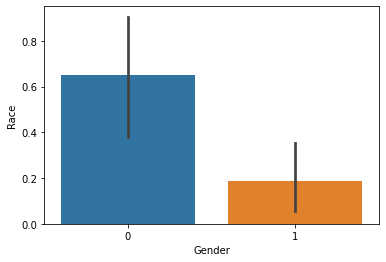

In [19]:
sns.barplot(x="Gender", y="Race", data=df)

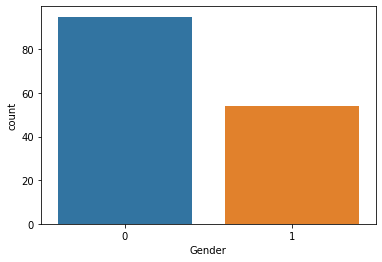

In [20]:
sns.countplot(x="Gender", data=df)

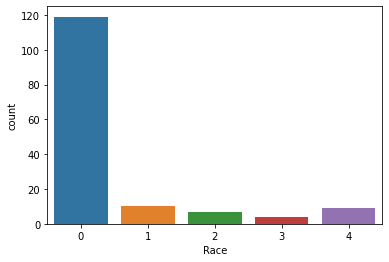

In [21]:
sns.countplot(x="Race", data=df)

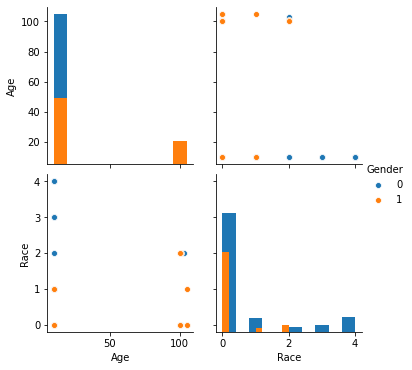

In [29]:
sns.pairplot(df, hue="Gender", diag_kind="hist")

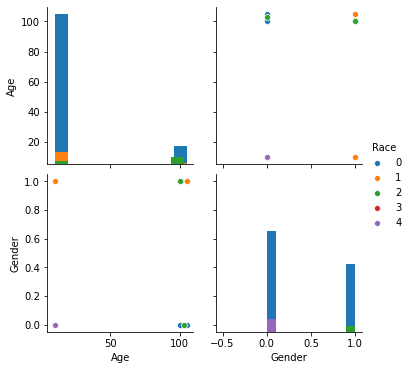

In [30]:
sns.pairplot(df, hue="Race", diag_kind="hist")

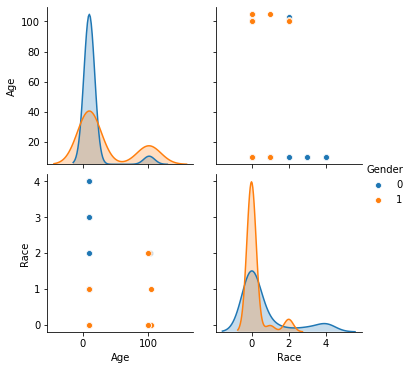

In [31]:
sns.pairplot(df, hue="Gender")

# Equal frequency binning

A less commonly used form of binning is known as equal-frequency binning, in which we divide a dataset into k bins that all have an equal number of frequencies.


In [24]:
import numpy as np
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

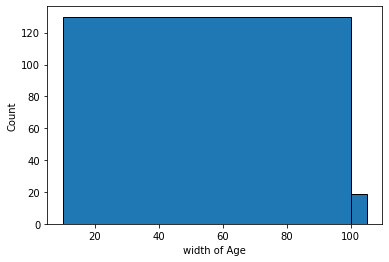

In [40]:
n, bins, patches = plt.hist(df["Age"], equalObs(df["Age"], 10), edgecolor='black')
plt.xlabel("width of Age")
plt.ylabel("Count")
plt.show()

In [26]:
bins, n

(array([ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10., 100., 105.]),
 array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 130.,  19.]))

# Equal width binning

The most common form of binning is known as equal-width binning, in which we divide a dataset into k bins of equal width.

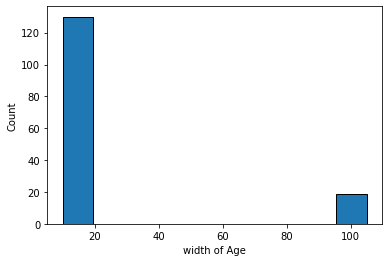

In [39]:
n, bins, patches = plt.hist(df["Age"], edgecolor='black')
plt.xlabel("width of Age")
plt.ylabel("Count")
plt.show()

In [23]:
bins, n

(array([ 10. ,  19.5,  29. ,  38.5,  48. ,  57.5,  67. ,  76.5,  86. ,
         95.5, 105. ]),
 array([130.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  19.]))

# Which discretization is said to be the best visualization for this dataset?

From the above visualizations, we can see that equal width binning intutuion about the dataset that we have more amount of data which is inclined to the Age from 10 to 19.5 and the count is about 130, where as the dataset that we are using has 19 images of people whose age is ranging from 95 to 105.


So the visualization using equal frequency binning give us the insights about the dataset provided when compared to the equal frequency binning because the frequency projecction of the data cover all the range of ages as shown in the above visualization where as the below width visualization only catures the data in particular age range. 

So, I prefer using equal frequency binning approach in this case.

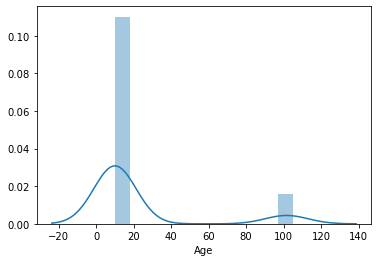

In [33]:
sns.distplot(df["Age"])